In [2]:
from fcmpy import ExpertFcm, FcmSimulator, FcmIntervention
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [3]:
fcm = ExpertFcm()

In [4]:
fcm.linguistic_terms = {
                        '-VH': [-1, -1, -0.75],
                        '-H': [-1, -0.75, -0.50],
                        '-M': [-0.75, -0.5, -0.25], 
                        '-L': [-0.5, -0.25, 0],
                        '-VL': [-0.25, 0, 0],
                        'NA': [-0.001, 0, 0.001],
                        '+VL': [0, 0, 0.25],
                        '+L': [0, 0.25, 0.50],
                        '+M': [0.25, 0.5, 0.75],
                        '+H': [0.5, 0.75, 1],
                        '+VH': [0.75, 1, 1]
                        }

fcm.universe = np.arange(-1, 1.05, .05)

fcm.fuzzy_membership = fcm.automf(method='trimf')

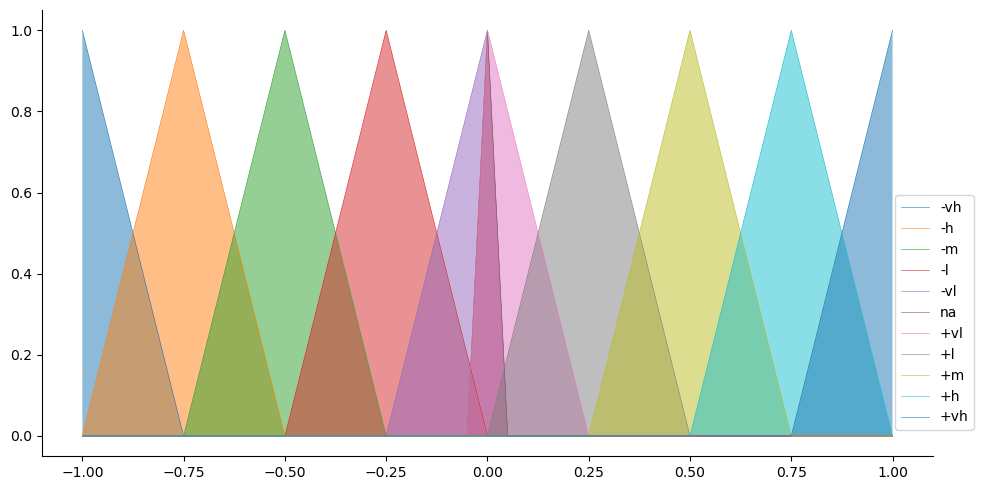

In [5]:
mfs = fcm.fuzzy_membership

fig = plt.figure(figsize= (10, 5))
axes = plt.axes()

for i in mfs:
    axes.plot(fcm.universe, mfs[i], linewidth=0.4, label=str(i))
    axes.fill_between(fcm.universe, mfs[i], alpha=0.5)

axes.legend(bbox_to_anchor=(0.95, 0.6))

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.get_xaxis().tick_bottom()
axes.get_yaxis().tick_left()
plt.tight_layout()


In [6]:
data = fcm.read_data(file_path= os.path.abspath('expertsR.xlsx'))

In [7]:
print(list(data.keys()),type(data))

['expert1', 'expert2', 'expert3', 'expert4', 'expert5', 'expert6', 'expert7', 'expert8'] <class 'collections.OrderedDict'>


In [8]:
entropy = fcm.entropy(data)
entropy

Entropy
From                                               To                                                          
Buena imagen de la industria                       Financiamiento                                      2.155639
Cantidad de mosca de establo                       Productividad de los ganaderos                      1.750000
                                                   Salud/bienestar de la comunidad                     1.405639
Colaboración/comunicación                          Innovación                                          0.954434
Contaminación del suelo, aire y agua               Salud/bienestar de la comunidad                     1.061278
Costo de materiales basados en combustibles fós... Demanda de productos PAL                            2.155639
                                                   Rentabilidad de las empresas piñeras                1.905639
Costumbres de la industria                         Valorización del rastrojo                           2.405639
Demanda de productos PAL                           Innovación                                          1.561278
                                                   Valorización del rastrojo                           1.500000
Desnivel del terreno                               Extracción del campo                                2.405639
Disponibilidad de la tierra                        Productividad de la producción de piña              2.155639
Empleo                                             Financiamiento                                      2.155639
                                                   Salud/bienestar de la comunidad                     1.405639
Extracción del campo                               Innovación                                          2.155639
                                                   Uso de agroquimicos                                 1.500000
                                                   Valorización del rastrojo                           2.155639
Financiamiento                                     Innovación                                          1.811278
                                                   Investigación académica                             1.405639
Inestabilidad internacional                        Costo de materiales basados en combustibles fós...  1.561278
Innovación                                         Extracción del campo                                1.298795
                                                   Productividad laboral                               1.905639
                                                   Valorización del rastrojo                           1.561278
Investigación académica                            Innovación                                          1.905639
Lluvia                                             Extracción del campo                                2.155639
Participación del gobierno                         Colaboración/comunicación                           1.750000
                                                   Regulación de manejo del rastrojo                   1.750000
Preferencia de los consumidores por productos s... Demanda de productos PAL                            1.905639
                                                   Uso de agroquimicos                                 2.155639
Productividad de la producción de piña             Rentabilidad de las empresas piñeras                1.405639
Productividad laboral                              Extracción del campo                                2.500000
Regulaciones y estándares de importación (de de... Uso de agroquimicos                                 1.561278
Regulación de manejo del rastrojo                  Cantidad de mosca de establo                        1.750000
                                                   Innovación                                          1.500000
                                                   Sostenibilidad de la 

In [9]:
#weight_matrix = fcm.build(data=data, implication_method='Larsen')

In [10]:
weight_matrix = fcm.build(data=data, implication_method = 'Larsen', aggregation_method = 'fMax', defuzz_method='centroid')
weight_matrix

,Buena imagen de la industria,Cantidad de mosca de establo,Colaboración/comunicación,"Contaminación del suelo, aire y agua",Costo de materiales basados en combustibles fósiles,Costumbres de la industria,Demanda de productos PAL,Desnivel del terreno,Disponibilidad de la tierra,Empleo,...,Regulaciones y estándares de importación (de destino),Regulación de manejo del rastrojo,Rentabilidad de las empresas piñeras,Riesgo empresarial,Salud/bienestar de la comunidad,Sostenibilidad de la industria,Tamaño de la empresa,Transparencia/apertura de la industria,Uso de agroquimicos,Valorización del rastrojo
Buena imagen de la industria,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0.00000,0,...,0,0.000000,0.000000,0,0.000000,0.000000,0,0,0.000000,0.000000
Cantidad de mosca de establo,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0.00000,0,...,0,0.000000,0.000000,0,-0.769113,0.000000,0,0,0.000000,0.000000
Colaboración/comunicación,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0.00000,0,...,0,0.000000,0.000000,0,0.000000,0.000000,0,0,0.000000,0.000000
"Contaminación del suelo, aire y agua",0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0.00000,0,...,0,0.000000,0.000000,0,-0.775000,0.000000,0,0,0.000000,0.000000
Costo de materiales basados en combustibles fósiles,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.581242,0,0.00000,0,...,0,0.000000,-0.513753,0,0.000000,0.000000,0,0,0.000000,0.000000
Costumbres de la industria,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0.00000,0,...,0,0.000000,0.000000,0,0.000000,0.000000,0,0,0.000000,-0.579252
Demanda de productos PAL,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0.00000,0,...,0,0.000000,0.000000,0,0.000000,0.000000,0,0,0.000000,0.713388
Desnivel del terreno,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0.00000,0,...,0,0.000000,0.000000,0,0.000000,0.000000,0,0,0.000000,0.000000
Disponibilidad de la tierra,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0.00000,0,...,0,0.000000,0.000000,0,0.000000,0.000000,0,0,0.000000,0.000000
Empleo,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0.00000,0,...,0,0.000000,0.000000,0,0.651491,0.000000,0,0,0.000000,0.000000


In [11]:
#check if a column is empty
weight_matrix.columns[weight_matrix.isna().any()].tolist()

[]

In [12]:
listC=weight_matrix.columns.tolist()
print(listC, len(listC))

['Buena imagen de la industria', 'Cantidad de mosca de establo', 'Colaboración/comunicación', 'Contaminación del suelo, aire y agua', 'Costo de materiales basados en combustibles fósiles', 'Costumbres de la industria', 'Demanda de productos PAL', 'Desnivel del terreno', 'Disponibilidad de la tierra', 'Empleo', 'Extracción del campo', 'Fertilidad del suelo', 'Financiamiento', 'Inestabilidad internacional ', 'Innovación', 'Investigación académica', 'Lluvia', 'Participación del gobierno', 'Preferencia de los consumidores por productos sostenibles', 'Productividad de la producción de piña', 'Productividad de los ganaderos', 'Productividad laboral', 'Regulaciones y estándares de importación (de destino)', 'Regulación de manejo del rastrojo', 'Rentabilidad de las empresas piñeras', 'Riesgo empresarial', 'Salud/bienestar de la comunidad', 'Sostenibilidad de la industria', 'Tamaño de la empresa', 'Transparencia/apertura de la industria', 'Uso de agroquimicos', 'Valorización del rastrojo'] 32


In [13]:
v = 0
init_state = {k:v for k in listC}
print(init_state)

{'Buena imagen de la industria': 0, 'Cantidad de mosca de establo': 0, 'Colaboración/comunicación': 0, 'Contaminación del suelo, aire y agua': 0, 'Costo de materiales basados en combustibles fósiles': 0, 'Costumbres de la industria': 0, 'Demanda de productos PAL': 0, 'Desnivel del terreno': 0, 'Disponibilidad de la tierra': 0, 'Empleo': 0, 'Extracción del campo': 0, 'Fertilidad del suelo': 0, 'Financiamiento': 0, 'Inestabilidad internacional ': 0, 'Innovación': 0, 'Investigación académica': 0, 'Lluvia': 0, 'Participación del gobierno': 0, 'Preferencia de los consumidores por productos sostenibles': 0, 'Productividad de la producción de piña': 0, 'Productividad de los ganaderos': 0, 'Productividad laboral': 0, 'Regulaciones y estándares de importación (de destino)': 0, 'Regulación de manejo del rastrojo': 0, 'Rentabilidad de las empresas piñeras': 0, 'Riesgo empresarial': 0, 'Salud/bienestar de la comunidad': 0, 'Sostenibilidad de la industria': 0, 'Tamaño de la empresa': 0, 'Transparen

In [14]:
sim = FcmSimulator()

In [15]:
res = sim.simulate(initial_state=init_state, weight_matrix=weight_matrix, transfer='sigmoid', inference='rescaled', thresh=0.001, iterations=50, l=1)
res

The values converged in the 15 state (e <= 0.001)


,Buena imagen de la industria,Cantidad de mosca de establo,Colaboración/comunicación,"Contaminación del suelo, aire y agua",Costo de materiales basados en combustibles fósiles,Costumbres de la industria,Demanda de productos PAL,Desnivel del terreno,Disponibilidad de la tierra,Empleo,...,Regulaciones y estándares de importación (de destino),Regulación de manejo del rastrojo,Rentabilidad de las empresas piñeras,Riesgo empresarial,Salud/bienestar de la comunidad,Sostenibilidad de la industria,Tamaño de la empresa,Transparencia/apertura de la industria,Uso de agroquimicos,Valorización del rastrojo
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,0.142104,0.546254,0.092460,0.148307,0.167330,0.0,0.057395,0.0,0.160345,0.0,...,0.0,0.154550,0.085221,0.0,0.473181,0.137421,0.0,0.0,0.880733,0.043654
2,0.318952,0.739761,0.109190,0.466586,0.219255,0.0,0.089311,0.0,0.217938,0.0,...,0.0,0.199367,0.109375,0.0,0.442468,0.199182,0.0,0.0,0.966327,0.074306
3,0.388432,0.792897,0.112488,0.652658,0.237550,0.0,0.106911,0.0,0.245576,0.0,...,0.0,0.214061,0.124336,0.0,0.252831,0.232724,0.0,0.0,0.965609,0.096511
4,0.350332,0.802959,0.113148,0.731415,0.244240,0.0,0.116563,0.0,0.261546,0.0,...,0.0,0.219046,0.135677,0.0,0.137882,0.251397,0.0,0.0,0.961496,0.112279
5,0.293753,0.802224,0.113280,0.760090,0.246718,0.0,0.121791,0.0,0.271834,0.0,...,0.0,0.220757,0.144160,0.0,0.099711,0.261814,0.0,0.0,0.958244,0.123444
6,0.258976,0.799533,0.113307,0.769530,0.247641,0.0,0.124602,0.0,0.278861,0.0,...,0.0,0.221346,0.150308,0.0,0.089472,0.267730,0.0,0.0,0.955818,0.131352
7,0.242837,0.797027,0.113312,0.772224,0.247985,0.0,0.126125,0.0,0.283799,0.0,...,0.0,0.221549,0.154676,0.0,0.086981,0.271215,0.0,0.0,0.954019,0.136888
8,0.236233,0.795095,0.113313,0.772698,0.248113,0.0,0.126975,0.0,0.287295,0.0,...,0.0,0.221619,0.157741,0.0,0.086561,0.273347,0.0,0.0,0.952709,0.140708
9,0.233738,0.793702,0.113314,0.772520,0.248161,0.0,0.127469,0.0,0.289759,0.0,...,0.0,0.221643,0.159875,0.0,0.086671,0.274689,0.0,0.0,0.951777,0.143324


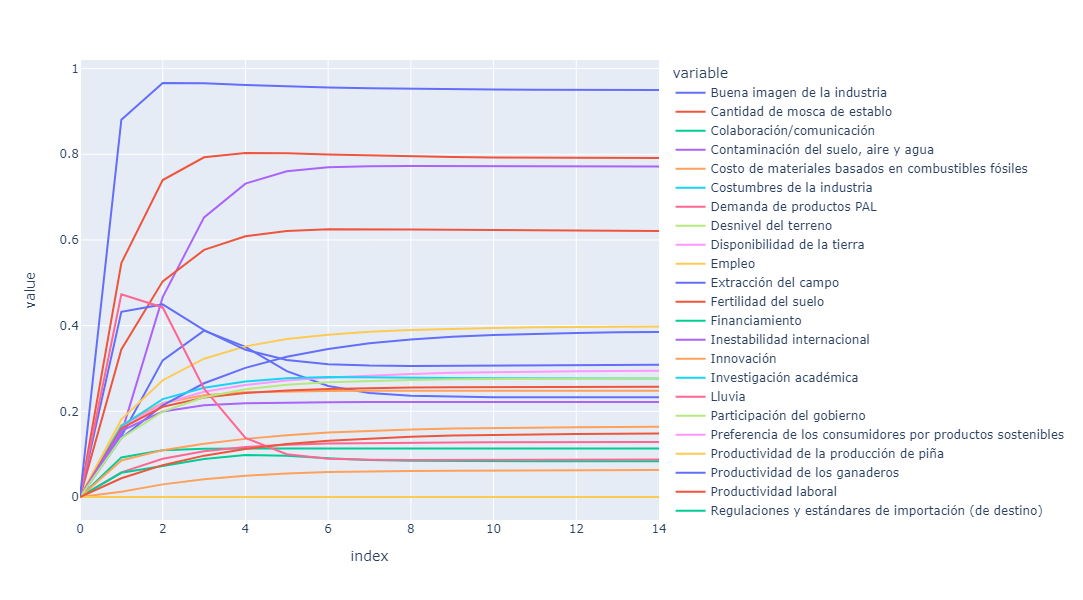

In [19]:
fig = px.line(res,height=600)
fig.show()

In [16]:
res.iloc[14]

Buena imagen de la industria                                 0.232666
Cantidad de mosca de establo                                 0.791044
Colaboración/comunicación                                    0.113314
Contaminación del suelo, aire y agua                         0.771448
Costo de materiales basados en combustibles fósiles          0.248189
Costumbres de la industria                                   0.000000
Demanda de productos PAL                                     0.128199
Desnivel del terreno                                         0.000000
Disponibilidad de la tierra                                  0.294472
Empleo                                                       0.000000
Extracción del campo                                         0.385358
Fertilidad del suelo                                         0.620811
Financiamiento                                               0.083319
Inestabilidad internacional                                  0.000000
Innovación          

In [17]:
inter = FcmIntervention(FcmSimulator)

In [18]:
inter.initialize(initial_state=init_state, weight_matrix=weight_matrix, transfer='sigmoid', inference='rescaled', thresh=0.001, iterations=50, l=1)

The values converged in the 15 state (e <= 0.001)


In [19]:
pd.options.display.max_columns = 100

In [20]:
inter.test_results['baseline']

,Buena imagen de la industria,Cantidad de mosca de establo,Colaboración/comunicación,"Contaminación del suelo, aire y agua",Costo de materiales basados en combustibles fósiles,Costumbres de la industria,Demanda de productos PAL,Desnivel del terreno,Disponibilidad de la tierra,Empleo,Extracción del campo,Fertilidad del suelo,Financiamiento,Inestabilidad internacional,Innovación,Investigación académica,Lluvia,Participación del gobierno,Preferencia de los consumidores por productos sostenibles,Productividad de la producción de piña,Productividad de los ganaderos,Productividad laboral,Regulaciones y estándares de importación (de destino),Regulación de manejo del rastrojo,Rentabilidad de las empresas piñeras,Riesgo empresarial,Salud/bienestar de la comunidad,Sostenibilidad de la industria,Tamaño de la empresa,Transparencia/apertura de la industria,Uso de agroquimicos,Valorización del rastrojo
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,0.142104,0.546254,0.092460,0.148307,0.167330,0.0,0.057395,0.0,0.160345,0.0,0.137053,0.344343,0.056516,0.0,0.012281,0.165477,0.0,0.0,0.0,0.181426,0.432336,0.160117,0.0,0.154550,0.085221,0.0,0.473181,0.137421,0.0,0.0,0.880733,0.043654
2,0.318952,0.739761,0.109190,0.466586,0.219255,0.0,0.089311,0.0,0.217938,0.0,0.214140,0.503401,0.072487,0.0,0.029491,0.228427,0.0,0.0,0.0,0.272621,0.449512,0.210656,0.0,0.199367,0.109375,0.0,0.442468,0.199182,0.0,0.0,0.966327,0.074306
3,0.388432,0.792897,0.112488,0.652658,0.237550,0.0,0.106911,0.0,0.245576,0.0,0.265485,0.576860,0.088924,0.0,0.041521,0.255103,0.0,0.0,0.0,0.322871,0.389382,0.231961,0.0,0.214061,0.124336,0.0,0.252831,0.232724,0.0,0.0,0.965609,0.096511
4,0.350332,0.802959,0.113148,0.731415,0.244240,0.0,0.116563,0.0,0.261546,0.0,0.301503,0.608498,0.098039,0.0,0.049669,0.269353,0.0,0.0,0.0,0.351581,0.343552,0.242532,0.0,0.219046,0.135677,0.0,0.137882,0.251397,0.0,0.0,0.961496,0.112279
5,0.293753,0.802224,0.113280,0.760090,0.246718,0.0,0.121791,0.0,0.271834,0.0,0.327222,0.620826,0.096044,0.0,0.055092,0.277251,0.0,0.0,0.0,0.368538,0.319993,0.248432,0.0,0.220757,0.144160,0.0,0.099711,0.261814,0.0,0.0,0.958244,0.123444
6,0.258976,0.799533,0.113307,0.769530,0.247641,0.0,0.124602,0.0,0.278861,0.0,0.345667,0.624750,0.090557,0.0,0.058256,0.279930,0.0,0.0,0.0,0.378916,0.310056,0.251983,0.0,0.221346,0.150308,0.0,0.089472,0.267730,0.0,0.0,0.955818,0.131352
7,0.242837,0.797027,0.113312,0.772224,0.247985,0.0,0.126125,0.0,0.283799,0.0,0.358736,0.625270,0.086649,0.0,0.059944,0.279643,0.0,0.0,0.0,0.385498,0.306653,0.254112,0.0,0.221549,0.154676,0.0,0.086981,0.271215,0.0,0.0,0.954019,0.136888
8,0.236233,0.795095,0.113313,0.772698,0.248113,0.0,0.126975,0.0,0.287295,0.0,0.367811,0.624590,0.084677,0.0,0.060897,0.278556,0.0,0.0,0.0,0.389811,0.305982,0.255342,0.0,0.221619,0.157741,0.0,0.086561,0.273347,0.0,0.0,0.952709,0.140708
9,0.233738,0.793702,0.113314,0.772520,0.248161,0.0,0.127469,0.0,0.289759,0.0,0.374019,0.623632,0.083824,0.0,0.061508,0.277629,0.0,0.0,0.0,0.392709,0.306294,0.256048,0.0,0.221643,0.159875,0.0,0.086671,0.274689,0.0,0.0,0.951777,0.143324


In [21]:
inter.add_intervention('intervention_1', type='continuous', impact={'Colaboración/comunicación':1}, effectiveness=1)

C:\Users\isaldiviagonzatti\anaconda3\lib\site-packages\fcmpy\intervention\interventionConstructor.py:109: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_vector = temp_vector.append(pd.Series({'intervention': effectiveness})).to_dict()


In [22]:
inter.test_intervention('intervention_1', iterations=20)

The values converged in the 15 state (e <= 0.001)


In [23]:
 inter.comparison_table

,baseline,intervention_1
Buena imagen de la industria,0.0,0.247716
Cantidad de mosca de establo,0.0,-0.803590
Colaboración/comunicación,0.0,222.022526
"Contaminación del suelo, aire y agua",0.0,-0.291127
Costo de materiales basados en combustibles fósiles,0.0,0.000083
Costumbres de la industria,NaN,NaN
Demanda de productos PAL,0.0,1.067606
Desnivel del terreno,NaN,NaN
Disponibilidad de la tierra,0.0,3.403516
Empleo,NaN,NaN


In [40]:
inter.test_results

{'baseline':     Buena imagen de la industria  Cantidad de mosca de establo  \
 0                       0.000000                      0.000000   
 1                       0.142104                      0.546254   
 2                       0.318952                      0.739761   
 3                       0.388432                      0.792897   
 4                       0.350332                      0.802959   
 5                       0.293753                      0.802224   
 6                       0.258976                      0.799533   
 7                       0.242837                      0.797027   
 8                       0.236233                      0.795095   
 9                       0.233738                      0.793702   
 10                      0.232877                      0.792725   
 11                      0.232629                      0.792049   
 12                      0.232595                      0.791584   
 13                      0.232625                 